In [1]:
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
 
%matplotlib inline 

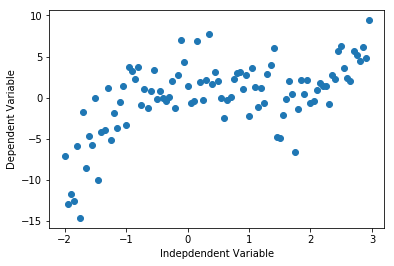

In [2]:
np.random.seed(1)

x_data = np.arange(-2.0, 3.0, 0.05)

beta0=2
beta1=-1
beta2=-2   # 这表示二次项
beta3=1  # 这表示三次项

y_data = beta0 + beta1*x_data + beta2*(x_data**2)+ beta3*(x_data**3)\
    + np.random.normal(0,3,len(x_data))

plt.plot(x_data,y_data,'o')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [3]:
#输入模型，即'X'变量

#注意，占位符意味着当我们调用tensorflow范式时我们已经传递了这个参数

x = tf.placeholder(tf.float32, shape=(x_data.size))

y = tf.placeholder(tf.float32,shape=(y_data.size))

# tf.Variable调用在内存中创建一个可更新的副本并高效地更新

# 该副本通过tensorflow会话的范围来重新传输变量值中的任何更改

beta_0 = tf.Variable(2.0)

beta_1 = tf.Variable(3.0)

beta_2 = tf.Variable(4.0)

beta_3 = tf.Variable(5.0)   

y_pred = tf.add(  beta_0,
                    tf.add( tf.multiply(beta_1,x),
                           tf.add( tf.multiply(beta_2, tf.multiply(x,x)),
                                  tf.multiply(beta_3, tf.multiply(x,tf.multiply(x,x)))))) 

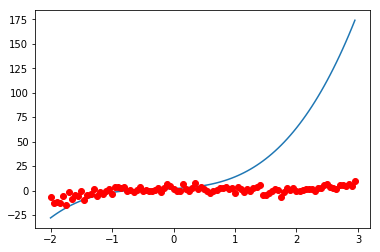

In [4]:
#创建session，并初始化变量

session = tf.Session()

session.run(tf.global_variables_initializer())

#用初始参数值进行预测

pred = session.run(y_pred, feed_dict={x:x_data, y:y_data})

#根据数据点绘制初始预测

plt.plot(x_data, pred)

plt.plot(x_data, y_data, 'ro')

In [5]:
# 标准化因子，我猜是为了让损失函数不至于过大，控制学习速率
nf = 1e-1

# 设置损失函数
loss = tf.reduce_mean(tf.squared_difference(y_pred*nf,y*nf))

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# 通过优化器应优化的损失函数

train = optimizer.minimize(loss)

session.run(tf.global_variables_initializer())

In [7]:
losses = [float("Inf")]

epoch = 10000 #1000000

#循环训练

for steps in  range(epoch):

    t,l = session.run([train, loss], feed_dict={x:x_data,y:y_data})

    losses.append(l)

    #如果损失开始改变小于1e-7，则停止训练

    if abs(losses[-1] - losses[-2]) < 10^-3:

        break

    if steps%1000 == 0:

        print("steps = %d  loss = %f"%(steps,losses[steps]))

        

print("steps = %d loss = %f"%(steps,losses[steps]))

steps = 0  loss = inf
steps = 1000  loss = 0.197009
steps = 2000  loss = 0.119587
steps = 3000  loss = 0.100819
steps = 4000  loss = 0.094441
steps = 5000  loss = 0.090922
steps = 6000  loss = 0.088264
steps = 7000  loss = 0.086021
steps = 8000  loss = 0.084070
steps = 9000  loss = 0.082359
steps = 9999 loss = 0.080854


beta_0 = 1.004781, beta_1 = 1.094178, beta_2 = -1.357563, beta_3 = 0.501319


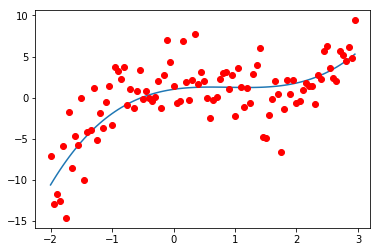

In [8]:
#从训练模型中得出预测值

pred,b0, b1, b2, b3 = session.run([y_pred, beta_0, beta_1, beta_2, beta_3], feed_dict={x:x_data,y:y_data})

#根据数据点绘制预测图

plt.plot(x_data, pred)

plt.plot(x_data, y_data, 'ro')

#输出最终参数

print("beta_0 = %f, beta_1 = %f, beta_2 = %f, beta_3 = %f" % (b0,b1, b2, b3))

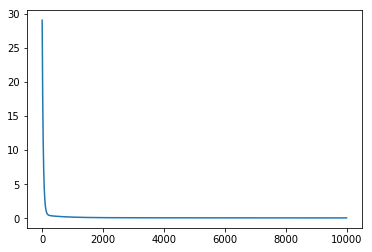

In [9]:
plt.plot(losses)